In [15]:
!pip install fastcluster

Defaulting to user installation because normal site-packages is not writeable


In [16]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import normalize
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import single, ward, complete, average, cophenet
from scipy.spatial.distance import pdist, squareform
import fastcluster as fc
from scipy.spatial import distance_matrix
from scipy.spatial import distance

In [17]:
# Importing the USArrests5 dataset
df=pd.read_csv("Downloads/USA5.csv")


In [18]:
df=pd.DataFrame(df)


In [19]:
df.head()


,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Idaho,2.6,120,54,14.2
2,NewYork,11.1,254,86,26.1
3,Virginia,8.5,156,63,20.7
4,Rhode,3.4,174,87,8.3


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   State     5 non-null      object 
 1   Murder    5 non-null      float64
 2   Assault   5 non-null      int64  
 3   UrbanPop  5 non-null      int64  
 4   Rape      5 non-null      float64
dtypes: float64(2), int64(2), object(1)
memory usage: 328.0+ bytes


In [ ]:
# Making the column "State" as the index

In [21]:
df=df.set_index('State')
df.head()

,Murder,Assault,UrbanPop,Rape
State,,,,
Alabama,13.2,236,58,21.2
Idaho,2.6,120,54,14.2
NewYork,11.1,254,86,26.1
Virginia,8.5,156,63,20.7
Rhode,3.4,174,87,8.3


In [25]:
from sklearn.preprocessing import normalize
data_scaled = normalize(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)

NameError: name 'data' is not defined

In [ ]:
import scipy.cluster.hierarchy as shc

In [ ]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrogram_w")  
dend = shc.dendrogram(shc.linkage(df_scaled, method='ward'))
plt.axhline(y=0.4, color='r', linestyle='--') #4 clstrs


NameError: name 'df_scaled' is not defined

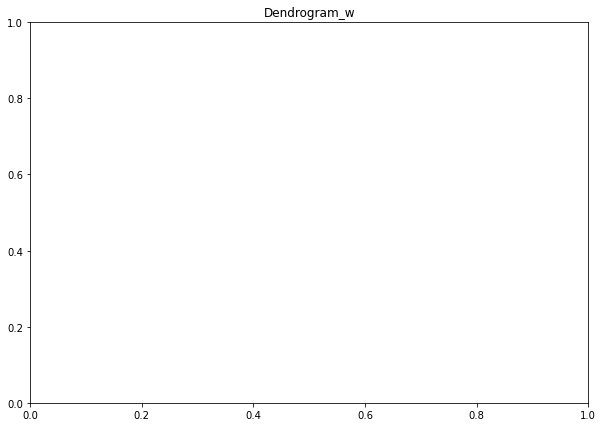

In [22]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrogram_w")  
dend = shc.dendrogram(shc.linkage(df_scaled, method='ward'))
plt.axhline(y=0.4, color='r', linestyle='--') #4 clstrs


In [ ]:
#__________________________________dist matrix

In [9]:
from scipy.spatial import distance_matrix
from scipy.spatial import distance
DM=pd.DataFrame(distance_matrix(df.values, df.values), index=df.index, 
             columns=df.index)
round(DM, 2)


State,Alabama,Idaho,NewYork,Virginia,Rhode
State,,,,,
Alabama,0.00,116.76,33.71,80.30,70.34
Idaho,116.76,0.00,138.54,38.13,63.56
NewYork,33.71,138.54,0.00,100.84,82.32
Virginia,80.30,38.13,100.84,0.00,32.86
Rhode,70.34,63.56,82.32,32.86,0.00


In [ ]:
#______Dendrogram

In [10]:
import scipy.cluster.hierarchy as shc

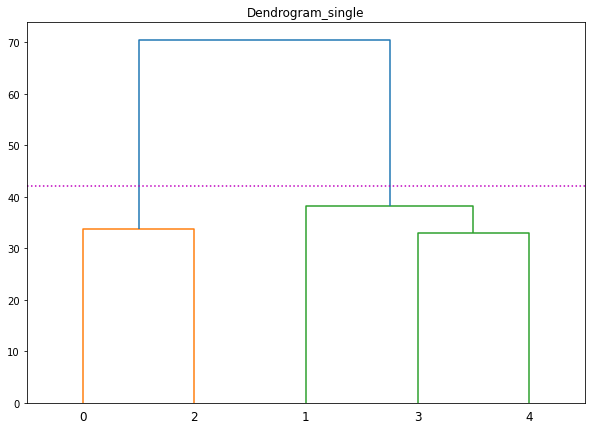

In [11]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrogram_single")  
dend = shc.dendrogram(shc.linkage(df, method='single'))
plt.axhline(y=42, color='m', linestyle=':') 


In [ ]:
#+++++++++++++++++++++++++cophenetic single

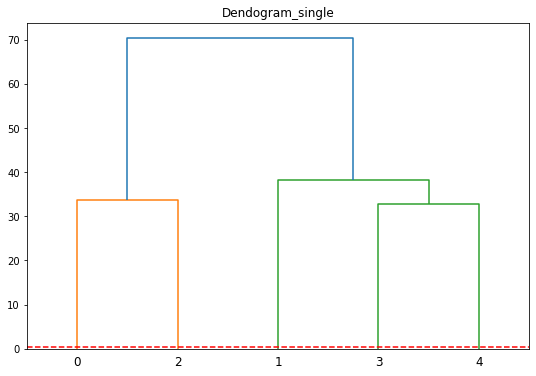

In [12]:
plt.figure(figsize=(9,6))
plt.title('Dendogram_single')
dend=shc.dendrogram(shc.linkage(df,method='single'))
plt.axhline(y=0.3,color='red',linestyle='--')


In [13]:
s = single(pdist(df))
s 

array([[ 3.        ,  4.        , 32.85985393,  2.        ],
       [ 0.        ,  2.        , 33.71082912,  2.        ],
       [ 1.        ,  5.        , 38.13213868,  3.        ],
       [ 6.        ,  7.        , 70.338112  ,  5.        ]])

In [ ]:
s_df =pd.DataFrame(s)

In [15]:
cophe_dists_s = cophenet(s) 
cophe_dists_s

array([70.338112  , 33.71082912, 70.338112  , 70.338112  , 70.338112  ,
       38.13213868, 38.13213868, 70.338112  , 70.338112  , 32.85985393])

In [16]:
cophe_dists_s_df = pd.DataFrame(cophe_dists_s)
orign_dists_s = fc.pdist(df) 

In [ ]:
# Calculating cophenetic correlation

In [18]:
corr_coef_s = np.corrcoef(orign_dists_s, cophe_dists_s)[0,1] 
corr_coef_s #0.82


0.8214977855537708

In [19]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
cluster.fit_predict(df)

array([3, 2, 1, 0, 0], dtype=int64)

In [20]:
df['cluster'] = cluster.labels_

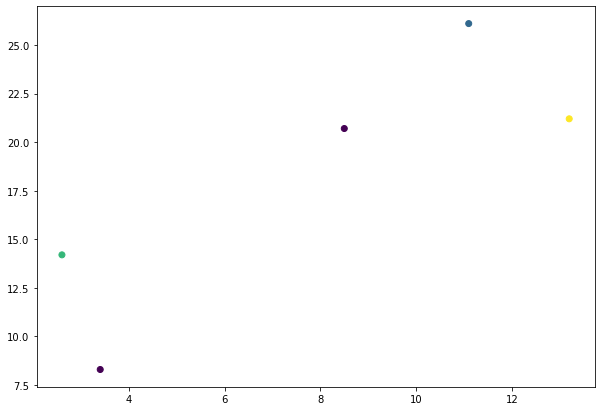

In [21]:
plt.figure(figsize=(10, 7))  
plt.scatter(df['Murder'], df['Rape'], c=cluster.labels_)

In [ ]:
#____________________seaborn

Text(0.42499999999999716, 0.5, 'Rape')

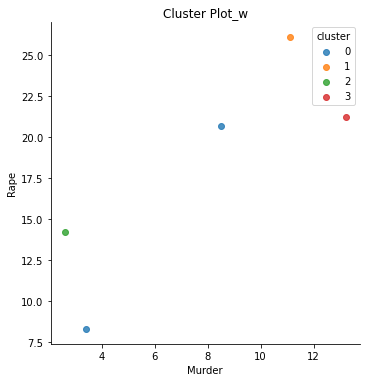

In [22]:
sns.lmplot(data=df, x='Murder', y='Rape', hue='cluster', 
                   fit_reg=False, legend=True, legend_out=False)
plt.title('Cluster Plot_w')
plt.xlabel('Murder')
plt.ylabel('Rape')

In [ ]:
#_____________cophenetic corr_ward

In [23]:
from scipy.cluster.hierarchy import single, ward, complete, average, cophenet
from scipy.spatial.distance import pdist, squareform
import fastcluster as fc
import numpy as np

In [24]:
w = ward(pdist(df))
w 

array([[  3.        ,   4.        ,  32.85985393,   2.        ],
       [  0.        ,   2.        ,  33.77010512,   2.        ],
       [  1.        ,   5.        ,  57.51883749,   3.        ],
       [  6.        ,   7.        , 148.44695124,   5.        ]])

In [25]:
w_df =pd.DataFrame(w)
cophe_dists_w = cophenet(w)
cophe_dists_w
cophe_dists_w_df = pd.DataFrame(cophe_dists_w)

In [26]:
orign_dists_w = fc.pdist(df) 

In [ ]:
# Calculating cophenetic correlation

In [27]:
corr_coef_w = np.corrcoef(orign_dists_w, cophe_dists_w)[0,1] 
corr_coef_w #0.82

0.825593795846236

In [ ]:
#_____________________________below in one run

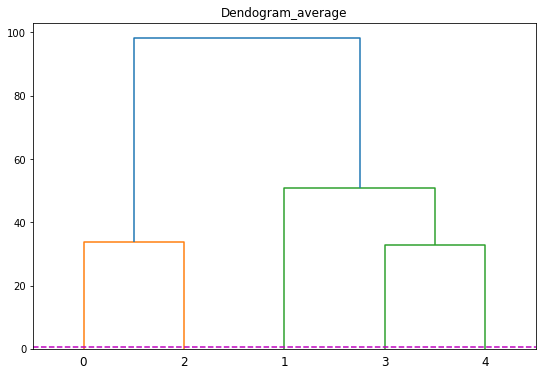

In [28]:
plt.figure(figsize=(9,6))
plt.title('Dendogram_average')
dend=shc.dendrogram(shc.linkage(df,method='average'))
plt.axhline(y=0.5,color='m',linestyle='--')

In [ ]:
#____cophenetic correlation_______________AVERAGE

In [29]:
from scipy.cluster.hierarchy import single, ward, complete, average, cophenet
from scipy.spatial.distance import pdist, squareform
import fastcluster as fc
import numpy as np

In [30]:
a = average(pdist(df)) # dists at which clubbing happened

In [31]:
a

array([[ 3.        ,  4.        , 32.85985393,  2.        ],
       [ 0.        ,  2.        , 33.77010512,  2.        ],
       [ 1.        ,  5.        , 50.89027114,  3.        ],
       [ 6.        ,  7.        , 98.20676865,  5.        ]])

In [32]:
a_df = pd.DataFrame(a)

In [33]:
cophe_dists_a = cophenet(a) 
cophe_dists_a

array([98.20676865, 33.77010512, 98.20676865, 98.20676865, 98.20676865,
       50.89027114, 50.89027114, 98.20676865, 98.20676865, 32.85985393])

In [35]:
cophe_dists_a_df = pd.DataFrame(cophe_dists_a)

In [36]:
orign_dists_a = fc.pdist(df) 

In [ ]:
# Calculating cophenetic correlation

In [37]:
corr_coef_a = np.corrcoef(orign_dists_a, cophe_dists_a)[0,1] 
corr_coef_a #0.83

0.8265913396107949

In [ ]:
#++++++++++++++++++++++++++++++++++++++++++++++++single

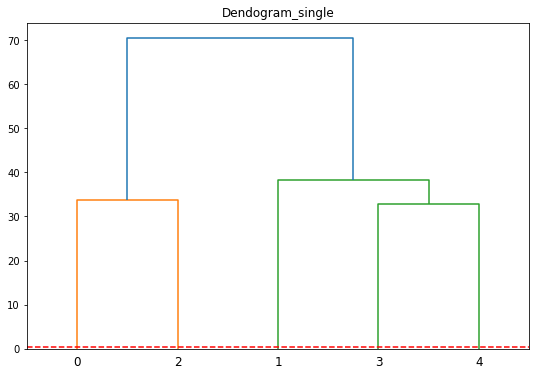

In [38]:
plt.figure(figsize=(9,6))
plt.title('Dendogram_single')
dend=shc.dendrogram(shc.linkage(df,method='single'))
plt.axhline(y=0.3,color='red',linestyle='--')

In [39]:
s = single(pdist(df))
s 

array([[ 3.        ,  4.        , 32.85985393,  2.        ],
       [ 0.        ,  2.        , 33.77010512,  2.        ],
       [ 1.        ,  5.        , 38.18455185,  3.        ],
       [ 6.        ,  7.        , 70.40205963,  5.        ]])

In [50]:
s_df =pd.DataFrame(s)
cophe_dists_s = cophenet(s) 
cophe_dists_s

array([70.40205963, 33.77010512, 70.40205963, 70.40205963, 70.40205963,
       38.18455185, 38.18455185, 70.40205963, 70.40205963, 32.85985393])

In [42]:
cophe_dists_s_df = pd.DataFrame(cophe_dists_s)
orign_dists_s = fc.pdist(df) 

In [ ]:
# Calculating cophenetic correlation

In [51]:
corr_coef_s = np.corrcoef(orign_dists_s, cophe_dists_s)[0,1] 
corr_coef_s #0.7577

0.821672095871609

In [ ]:
#++++++++++++++++++++++++++++++++++++++++++++++++complete

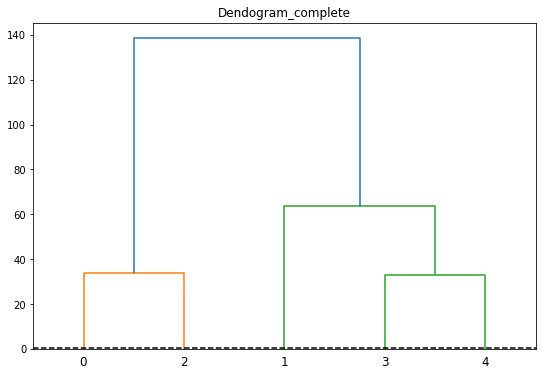

In [45]:
plt.figure(figsize=(9,6))
plt.title('Dendogram_complete')
dend=shc.dendrogram(shc.linkage(df,method='complete'))
plt.axhline(y=0.5,color='k',linestyle='--')

In [46]:
c = complete(pdist(df))
c 

array([[  3.        ,   4.        ,  32.85985393,   2.        ],
       [  0.        ,   2.        ,  33.77010512,   2.        ],
       [  1.        ,   5.        ,  63.59599044,   3.        ],
       [  6.        ,   7.        , 138.54551599,   5.        ]])

In [47]:
c_df =pd.DataFrame(c)
cophe_dists_c = cophenet(c) 

In [48]:
orign_dists_c = fc.pdist(df) 

In [ ]:
# Calculating cophenetic correlation

In [49]:
corr_coef_c = np.corrcoef(orign_dists_c, cophe_dists_c)[0,1] 
corr_coef_c #0.81

0.8265056578217064